# Modelling Classical, probabilistic, and Quantum Systems

## Classical Discrete Systems
![Deterministic System](images/ClassicPhysicalSystem.png)



Modeling the dynamic behaviors and the state of a classical discrete system using matrices and vectors. The state after one click is computed as follows:

$$ 
    \begin{bmatrix} 0 && 0 && 0 && 0 && 0 && 0 \\
                   0 && 0 && 0 && 0 && 0 && 0 \\
                   0 && 1 && 0 && 0 && 0 && 1 \\
                   0 && 0 && 0 && 1 && 0 && 0 \\
                   0 && 0 && 1 && 0 && 0 && 0 \\
                   1 && 0 && 0 && 0 && 1 && 0 \\
    \end{bmatrix}
    \begin{bmatrix} 6 \\
                    2 \\
                    1 \\
                    5 \\
                    3 \\
                    10 \\
    \end{bmatrix}
    =
    \begin{bmatrix} 0 \\
                    0 \\
                    12 \\
                    5 \\
                    1 \\
                    9 \\
    \end{bmatrix}$$

In [2]:
import numpy as np

# Define two 3x3 complex matrices
m1 = np.array([[0,0,0,0,0,0], 
               [0,0,0,0,0,0], 
               [0,1,0,0,0,1],
               [0,0,0,1,0,0], 
               [0,0,1,0,0,0], 
               [1,0,0,0,1,0]])

v1 = np.array([[6], [2], [1], [5], [3], [10]])


print("Input: ", m1)
print(v1)
# Multiplying a 3x3 matrix by a 3x1 vector
state_after_one_click = np.dot(m1, v1)
print("Result after one Click: \n", state_after_one_click)

Input:  [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 1]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 1 0]]
[[ 6]
 [ 2]
 [ 1]
 [ 5]
 [ 3]
 [10]]
Result after one Click: 
 [[ 0]
 [ 0]
 [12]
 [ 5]
 [ 1]
 [ 9]]


![State after two clicks.](images/ClassicPhysicalSystem2.png)

The state after two cliks is computed as follows:

In [3]:
print("Result after two clicks: \n", np.dot(m1,state_after_one_click))

Result after two clicks: 
 [[ 0]
 [ 0]
 [ 9]
 [ 5]
 [12]
 [ 1]]


## Exercises 



### Excercise 1:

1. Write a program to model the behavior of the probabilistic double slit example depicted in the figure.
2. Show the results of the experiment using a bar diagram. Each bar represents the intensity of the light at the specific target.


![Probabilistic Double slit.](images/ProbabilisticSystem.png)

Probabilistic Double Slit Experiment
Initial State:
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]]
Transition Matrix:
[[0.         0.         0.         0.         0.         0.        ]
 [0.5        0.         0.         0.         0.         0.        ]
 [0.5        0.         0.         0.         0.         0.        ]
 [0.         0.33333333 0.         1.         0.         0.        ]
 [0.         0.33333333 0.         0.         1.         0.        ]
 [0.         0.33333333 0.33333333 0.         0.         1.        ]]
State after one click:
[[0. ]
 [0.5]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
Final State after two clicks:
[[0.        ]
 [0.        ]
 [0.        ]
 [0.16666667]
 [0.16666667]
 [0.33333333]]


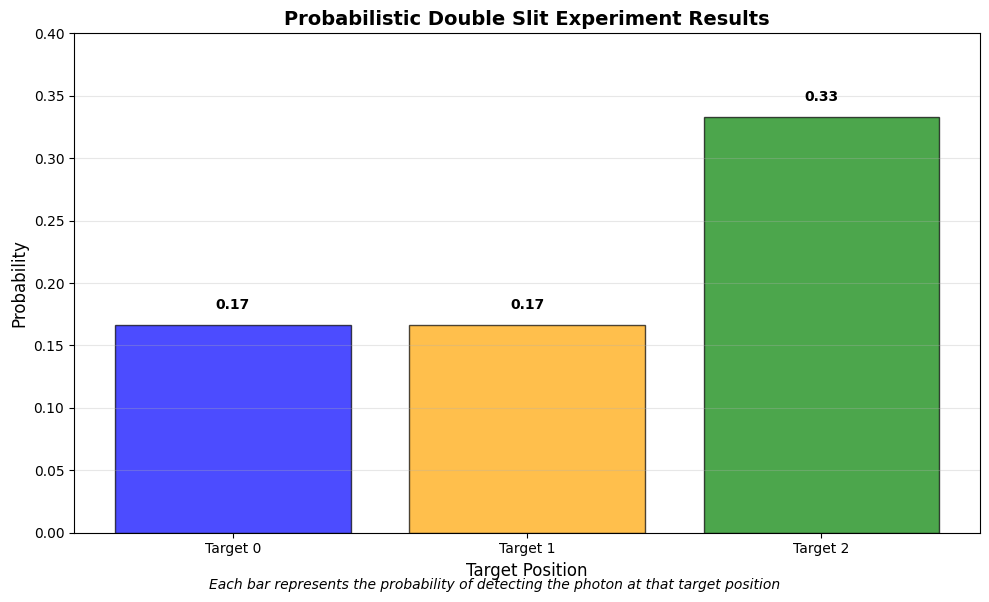


Summary:
Target 0 probability: 0.167
Target 1 probability: 0.167
Target 2 probability: 0.333
Total probability: 0.667


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def probabilistic_double_slit():
    # Matriz de transición 6x6 (ajustada para el ejemplo)
    transition_matrix = np.array([
        [0  , 0  , 0  , 0 , 0 , 0 ],
        [1/2, 0  , 0  , 0 , 0 , 0 ],
        [1/2, 0  , 0  , 0 , 0 , 0 ],
        [0  , 1/3, 0  , 1 , 0 , 0 ],
        [0  , 1/3, 0  , 0 , 1 , 0 ],
        [0  , 1/3, 1/3, 0 , 0 , 1 ]
    ])
    initial_state = np.array([[1], [0], [0], [0], [0], [0]])

    print("Probabilistic Double Slit Experiment")
    print("=" * 70)
    print(f"Initial State:\n{initial_state}")
    print(f"Transition Matrix:\n{transition_matrix}")

    state_after_one_click = np.dot(transition_matrix, initial_state)
    print(f"State after one click:\n{state_after_one_click}")

    final_state = np.dot(transition_matrix, state_after_one_click)
    print(f"Final State after two clicks:\n{final_state}")
    return transition_matrix, initial_state, final_state

def plot_probabilistic_results(final_state):
    # Extrae probabilidades de los 3 últimos elementos (targets)
    target_probabilities = final_state[3:6].flatten()
    target_labels = ['Target 0', 'Target 1', 'Target 2']

    plt.figure(figsize=(10,6))
    bars = plt.bar(target_labels, target_probabilities,
                   color=['blue', 'orange', 'green'], alpha=0.7, edgecolor='black')
                
    for bar, prob in zip(bars, target_probabilities):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, 
                 f'{prob:.2f}', ha='center', va='bottom', fontweight='bold')

    plt.xlabel('Target Position', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title('Probabilistic Double Slit Experiment Results', fontsize=14, fontweight='bold')
    plt.ylim(0, max(target_probabilities) * 1.2 if max(target_probabilities) > 0 else 0.5)
    plt.grid(axis='y', alpha=0.3)
    plt.figtext(0.5, 0.01,
                'Each bar represents the probability of detecting the photon at that target position',
                ha='center', fontsize=10, style='italic')
    plt.tight_layout()
    plt.show()

    return target_probabilities

# --- EJECUCIÓN ---
transition_matrix, initial_state, final_state = probabilistic_double_slit()
target_probabilities = plot_probabilistic_results(final_state)

print(f"\nSummary:")
print(f"Target 0 probability: {target_probabilities[0]:.3f}")
print(f"Target 1 probability: {target_probabilities[1]:.3f}")
print(f"Target 2 probability: {target_probabilities[2]:.3f}")
print(f"Total probability: {np.sum(target_probabilities):.3f}")




### Excercise 2:

1. Write a program to model the behavior of the quantum double slit example depicted in the figure.
2. Show the results of the experiment using a bar diagram. Each bar represents the intensity of the light at the specific target.


![Probabilistic Double slit.](images/QuantumSystem.png)

Quantum Double Slit Experiment
Initial State:
[[1.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]
Transition Matrix (Complex):
[[ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j -0.57735027+0.j  0.57735027+0.j  1.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.57735027+0.j  0.57735027+0.j  0.        +0.j
   1.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.57735027+0.j -0.57735027+0.j  0.        +0.j
   0.        +0.j  1.        +0.j]]
State after one click (at slits):
[[0.        +0.j]
 [0.70710678+0.j]
 [0.70710678+0.j]
 [0.        +0.j]
 [0.        +0.j]
 [0.        +0.j]]
Final State after two clicks (complex amplitudes):
[[0.        +0.j]
 [0.        +0.j]
 [0.        +0.j]
 [0.     

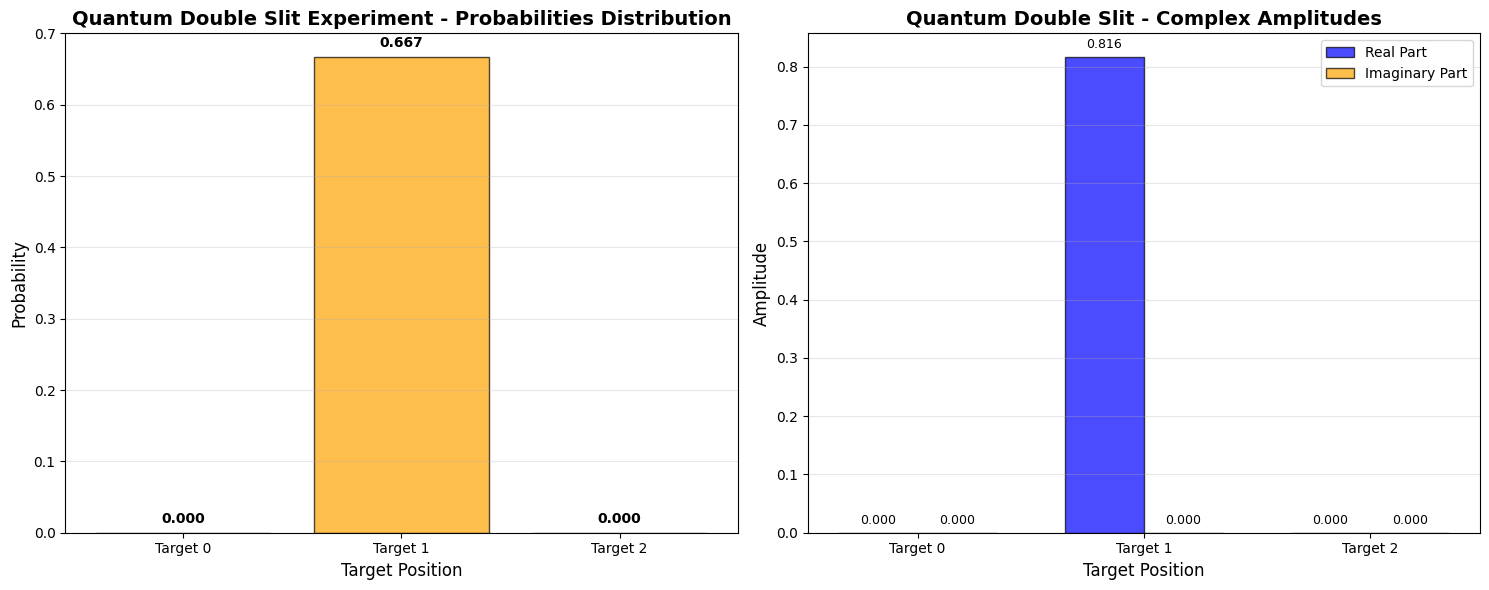


Quantum System Summary:
Target 0 probability: 0.000
Target 1 probability: 0.667
Target 2 probability: 0.000
Total probability: 0.667

Interference Analysis:
Unlike the probabilistic case (uniform 0.333), quantum interference
creates a different pattern due to constructive and destructive interference.


In [23]:
import numpy as np
import matplotlib.pyplot as plt

def quantum_double_slit():
    # Matriz de transición 6x6 con amplitudes complejas para interferencia
    transition_matrix = np.array([
        [0,      0,         0,         0,    0,    0],
        [1/np.sqrt(2), 0,   0,         0,    0,    0],
        [1/np.sqrt(2), 0,   0,         0,    0,    0],
        [0, -1/np.sqrt(3), 1/np.sqrt(3), 1, 0, 0],
        [0, 1/np.sqrt(3), 1/np.sqrt(3), 0, 1, 0],
        [0, 1/np.sqrt(3), -1/np.sqrt(3), 0, 0, 1]
    ], dtype=complex)

    initial_state = np.zeros((6,1), dtype=complex)
    initial_state[0,0] = 1

    print("Quantum Double Slit Experiment")
    print("=" * 70)
    print(f"Initial State:\n{initial_state}")
    print(f"Transition Matrix (Complex):\n{transition_matrix}")

    state_after_one_click = np.dot(transition_matrix, initial_state)
    print(f"State after one click (at slits):\n{state_after_one_click}")

    final_state = np.dot(transition_matrix, state_after_one_click)
    print(f"Final State after two clicks (complex amplitudes):\n{final_state}")

    probabilities = np.abs(final_state)**2
    print(f"Final probabilities:\n{probabilities}")

    return transition_matrix, initial_state, final_state, probabilities

def plot_quantum_results(final_state, probabilities):
    # Tomamos los 3 últimos como targets
    target_probabilities = probabilities[-3:].flatten()
    target_amplitudes = final_state[-3:].flatten()
    target_labels = ['Target 0', 'Target 1', 'Target 2']

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

    bars1 = ax1.bar(target_labels, target_probabilities,
                    color=['blue', 'orange', 'green'], alpha=0.7, edgecolor='black')

    for bar, prob in zip(bars1, target_probabilities):
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.01, 
                 f'{prob:.3f}', ha='center', va='bottom', fontweight='bold')

    ax1.set_xlabel('Target Position', fontsize=12)
    ax1.set_ylabel('Probability', fontsize=12)
    ax1.set_title('Quantum Double Slit Experiment - Probabilities Distribution', 
                   fontsize=14, fontweight='bold')    
    ax1.grid(axis='y', alpha=0.3)

    x_pos = np.arange(len(target_labels))
    width = 0.35

    real_parts = np.real(target_amplitudes)
    imag_parts = np.imag(target_amplitudes)

    bars2 = ax2.bar(x_pos - width/2, real_parts, width, label='Real Part', 
                    color='blue', alpha=0.7, edgecolor='black')           
    bars3 = ax2.bar(x_pos + width/2, imag_parts, width, label='Imaginary Part', 
                    color='orange', alpha=0.7, edgecolor='black')

    for bar, val in zip(bars2, real_parts):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{val:.3f}', ha='center', va='bottom', fontsize=9)
    
    for bar, val in zip(bars3, imag_parts):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{val:.3f}', ha='center', va='bottom', fontsize=9)

    ax2.set_xlabel('Target Position', fontsize=12)
    ax2.set_ylabel('Amplitude', fontsize=12)
    ax2.set_title('Quantum Double Slit - Complex Amplitudes', 
                  fontsize=14, fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(target_labels)
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return target_probabilities

# Ejecutar el experimento de doble rendija cuántico
transition_matrix, initial_state, final_state, probabilities = quantum_double_slit()
target_probs = plot_quantum_results(final_state, probabilities)

print(f"\nQuantum System Summary:")
print(f"Target 0 probability: {target_probs[0]:.3f}")
print(f"Target 1 probability: {target_probs[1]:.3f}")
print(f"Target 2 probability: {target_probs[2]:.3f}")
print(f"Total probability: {np.sum(target_probs):.3f}")

print(f"\nInterference Analysis:")
print(f"Unlike the probabilistic case (uniform 0.333), quantum interference")
print(f"creates a different pattern due to constructive and destructive interference.")

## Exercise 3: Simulating the Double Slit Experiment with Waves

### Objective

In this exercise, you will create a simulation of the double slit experiment using Python. Unlike particle-based interpretations, you will model light as waves and observe the interference pattern that emerges when waves pass through two slits and overlap on a screen. This simulation will help you visualize how constructive and destructive interference patterns form.

### Background

The double slit experiment demonstrates the wave-particle duality of light and
matter. When coherent light passes through two closely spaced slits, it creates
an interference pattern of bright and dark fringes on a detection screen. This
pattern results from the constructive and destructive interference of the waves
emanating from the slits.

### References

[Mathematics of Interference](https://phys.libretexts.org/Bookshelves/University_Physics/University_Physics_(OpenStax)/University_Physics_III_-_Optics_and_Modern_Physics_(OpenStax)/03%3A_Interference/3.03%3A_Mathematics_of_Interference)

### Task

Your task is to simulate the wave interference pattern using Python. Assume each slit acts as a point source of waves that spread out in circular patterns. When these waves overlap, they interfere with each other, creating a pattern of alternating high and low intensity on a screen.

### Steps

1. **Setup the Environment**: Ensure you have Python installed with the necessary libraries: NumPy for numerical calculations and Matplotlib for plotting.

2. **Define Parameters**:
   - Define the distance between the slits, the wavelength of the light, the distance from the slits to the screen, and the number of points on the screen where intensity will be calculated.

3. **Model the Waves**:
   - For simplicity, you can assume the wavefronts are straight lines perpendicular to the direction of propagation. Use the Huygens-Fresnel principle to model each slit as a source of new waves.

4. **Calculate Intensity**:
   - Use the principle of superposition to calculate the resultant wave amplitude at each point on the screen by summing the contributions from each slit.
   - The intensity of light at each point is proportional to the square of the amplitude of the resultant wave.

5. **Plot the Results**:
   - Plot the calculated intensity pattern on the screen. You should observe a series of bright and dark fringes, demonstrating the interference pattern.

### Hints

- Use NumPy arrays to efficiently calculate the wave amplitudes and intensities across the screen.
- Remember, the phase difference between the waves from the two slits contributes to the constructive (in-phase) and destructive (out-of-phase) interference.

### Sample Code Skeleton




Starting Double Slit Wave Simulation...
Double Slit Wave Simulation Parameters:
Slit separation: 1.0 mm
Wavelength: 500 nm
Screen distance: 1.0 m
Screen width: 5.0 cm
Screen resolution: 1000 points


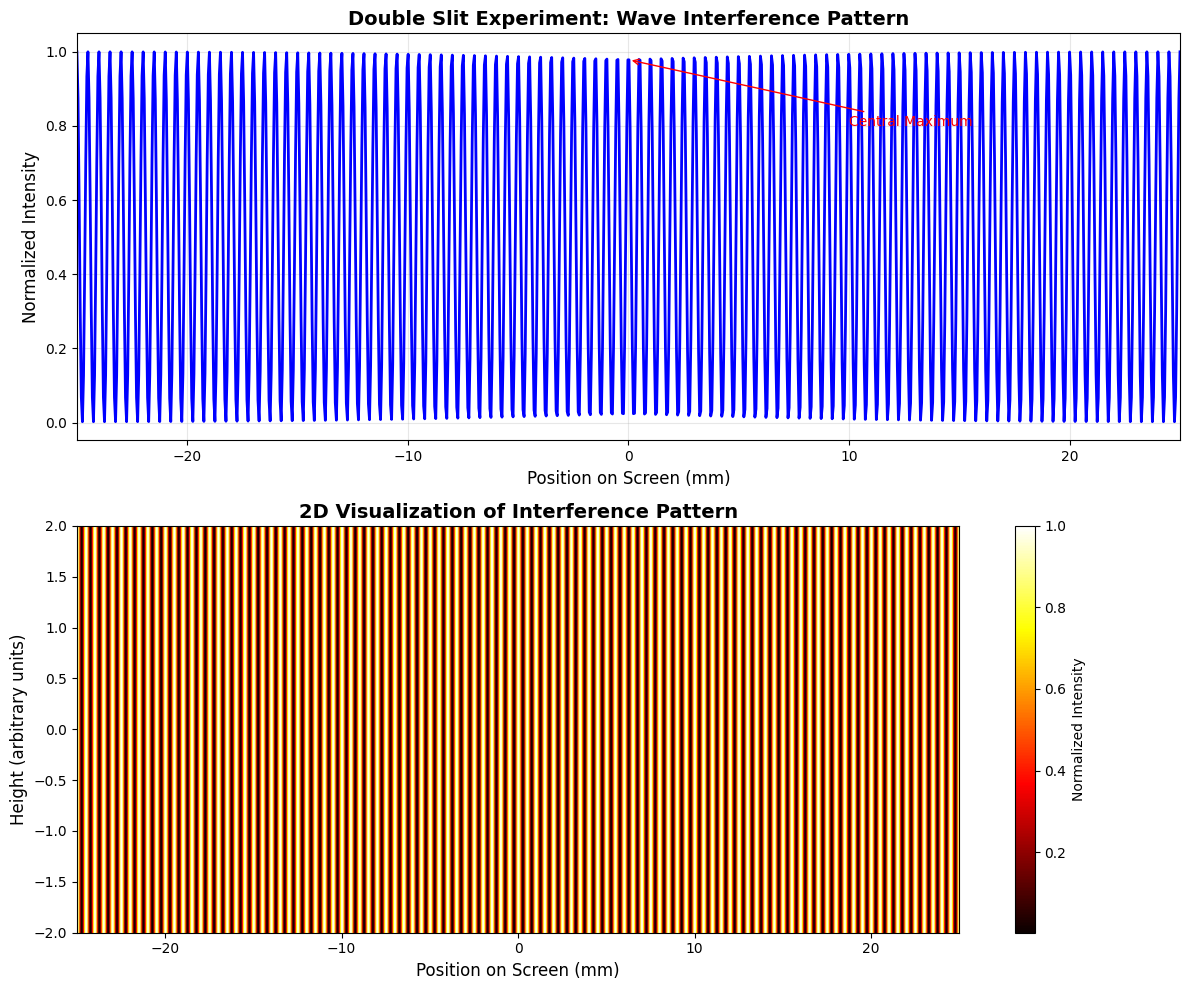


Interference Pattern Analysis:
Number of bright fringes detected: 98
Average fringe spacing: 0.51 mm
Theoretical fringe spacing: 0.50 mm
Difference: 0.01 mm
Pattern visibility (contrast): 0.995
This indicates good interference quality

Simulation Complete!
The interference pattern shows the characteristic bright and dark fringes
that result from constructive and destructive wave interference.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def double_slit_wave_simulation():
    
    slit_distance = 0.001      # 1 mm separation between slits
    wavelength = 500e-9        # 500 nm (green light)
    screen_distance = 1.0      # 1 meter from slits to screen
    screen_width = 0.05        # 5 cm screen width
    num_points = 1000          # resolution of screen
    
    print("Double Slit Wave Simulation Parameters:")
    print("=" * 45)
    print(f"Slit separation: {slit_distance*1000:.1f} mm")
    print(f"Wavelength: {wavelength*1e9:.0f} nm")
    print(f"Screen distance: {screen_distance:.1f} m")
    print(f"Screen width: {screen_width*100:.1f} cm")
    print(f"Screen resolution: {num_points} points")
    
    screen_points = np.linspace(-screen_width/2, screen_width/2, num_points)
    
    k = 2 * np.pi / wavelength
    
    slit1_y = -slit_distance / 2
    slit2_y = slit_distance / 2
    
    intensity_pattern = np.zeros(num_points)
    
    for i, y in enumerate(screen_points):
        r1 = np.sqrt(screen_distance**2 + (y - slit1_y)**2)
        r2 = np.sqrt(screen_distance**2 + (y - slit2_y)**2)
        
        phase_diff = k * (r2 - r1)
        
        # For simplicity, assume equal amplitude from both slits
        # The amplitude at the screen is the sum of contributions from both slits
        amplitude1 = np.exp(1j * k * r1) / r1  # Include 1/r decay
        amplitude2 = np.exp(1j * k * r2) / r2
        
        total_amplitude = amplitude1 + amplitude2
        
        intensity_pattern[i] = abs(total_amplitude)**2
    
    # Normalize intensity pattern
    intensity_pattern = intensity_pattern / np.max(intensity_pattern)
    
    return screen_points, intensity_pattern

def plot_wave_interference_results(screen_points, intensity_pattern):
    """
    Creates comprehensive plots showing the wave interference pattern.
    
    Args:
        screen_points (np.array): Positions on the screen
        intensity_pattern (np.array): Calculated intensity values
    """
    
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot 1: Interference pattern as a line plot
    ax1.plot(screen_points * 1000, intensity_pattern, 'b-', linewidth=2)
    ax1.set_xlabel('Position on Screen (mm)', fontsize=12)
    ax1.set_ylabel('Normalized Intensity', fontsize=12)
    ax1.set_title('Double Slit Experiment: Wave Interference Pattern', 
                  fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(screen_points[0] * 1000, screen_points[-1] * 1000)
    
    max_indices = []
    for i in range(1, len(intensity_pattern) - 1):
        if (intensity_pattern[i] > intensity_pattern[i-1] and 
            intensity_pattern[i] > intensity_pattern[i+1] and 
            intensity_pattern[i] > 0.1):  # Only significant maxima
            max_indices.append(i)
    
    central_idx = len(intensity_pattern) // 2
    ax1.annotate('Central Maximum', 
                xy=(screen_points[central_idx] * 1000, intensity_pattern[central_idx]),
                xytext=(10, 0.8), textcoords='data',
                arrowprops=dict(arrowstyle='->', color='red'),
                fontsize=10, color='red')
    
    screen_2d = np.tile(intensity_pattern, (50, 1))
    
    extent = [screen_points[0] * 1000, screen_points[-1] * 1000, -2, 2]
    im = ax2.imshow(screen_2d, extent=extent, cmap='hot', aspect='auto', origin='lower')
    ax2.set_xlabel('Position on Screen (mm)', fontsize=12)
    ax2.set_ylabel('Height (arbitrary units)', fontsize=12)
    ax2.set_title('2D Visualization of Interference Pattern', 
                  fontsize=14, fontweight='bold')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax2)
    cbar.set_label('Normalized Intensity', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    return max_indices

def analyze_interference_pattern(screen_points, intensity_pattern):

    peaks = []
    for i in range(1, len(intensity_pattern) - 1):
        if (intensity_pattern[i] > intensity_pattern[i-1] and 
            intensity_pattern[i] > intensity_pattern[i+1] and 
            intensity_pattern[i] > 0.1):
            peaks.append(i)
    
    if len(peaks) > 1:
        peak_positions = [screen_points[p] for p in peaks]
        fringe_spacings = [abs(peak_positions[i+1] - peak_positions[i]) 
                          for i in range(len(peak_positions)-1)]
        avg_fringe_spacing = np.mean(fringe_spacings)
        
        print(f"\nInterference Pattern Analysis:")
        print(f"Number of bright fringes detected: {len(peaks)}")
        print(f"Average fringe spacing: {avg_fringe_spacing*1000:.2f} mm")
        
        wavelength = 500e-9
        screen_distance = 1.0
        slit_distance = 0.001
        theoretical_spacing = wavelength * screen_distance / slit_distance
        
        print(f"Theoretical fringe spacing: {theoretical_spacing*1000:.2f} mm")
        print(f"Difference: {abs(avg_fringe_spacing - theoretical_spacing)*1000:.2f} mm")
    
    max_intensity = np.max(intensity_pattern)
    min_intensity = np.min(intensity_pattern)
    visibility = (max_intensity - min_intensity) / (max_intensity + min_intensity)
    
    print(f"Pattern visibility (contrast): {visibility:.3f}")
    print(f"This indicates {'good' if visibility > 0.8 else 'moderate' if visibility > 0.5 else 'poor'} interference quality")

print("Starting Double Slit Wave Simulation...")
screen_points, intensity = double_slit_wave_simulation()

max_indices = plot_wave_interference_results(screen_points, intensity)

analyze_interference_pattern(screen_points, intensity)

print(f"\nSimulation Complete!")
print(f"The interference pattern shows the characteristic bright and dark fringes")
print(f"that result from constructive and destructive wave interference.")